<a href="https://colab.research.google.com/github/A-P-Dharanya/VRP/blob/main/Vehicle_Routing_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries
!pip install matplotlib deap
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 1.8 MB/s eta 0:00:00


In [4]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = 10 # Define the number of locations (eg 10)

locations = [(random.randint(0,100),random.randint(0,100))for _ in range(num_locations)]# Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot = (50,50) # Define the coordinates for the depot

num_vehicles = 3# Define the number of vehicles - (eg 3)

print("Number of locations:", num_locations)
print("Locations coordinates:", locations)
print("Depot coordinates:", depot)
print("Number of vehicles:", num_vehicles)

Number of locations: 10
Locations coordinates: [(14, 91), (75, 3), (78, 67), (58, 54), (42, 27), (70, 43), (14, 98), (45, 20), (4, 62), (89, 34)]
Depot coordinates: (50, 50)
Number of vehicles: 3


In [5]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin",base.Fitness, weights=(-1.0,-1.0) )
creator.create("Individual",list, fitness=creator.FitnessMin )


In [6]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)#finish defining how to build an individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual) #finish defining how to build an population)
population = toolbox.population(n=10)

print(population)

[[3, 2, 7, 6, 4, 1, 5, 0, 9, 8], [5, 1, 4, 2, 6, 3, 8, 0, 7, 9], [4, 7, 9, 0, 5, 1, 8, 6, 3, 2], [1, 0, 4, 8, 3, 7, 6, 2, 9, 5], [9, 3, 6, 1, 2, 8, 5, 4, 0, 7], [9, 0, 8, 5, 7, 2, 3, 1, 6, 4], [2, 3, 8, 9, 6, 7, 0, 5, 1, 4], [8, 5, 3, 4, 7, 1, 2, 0, 9, 6], [6, 5, 2, 8, 7, 4, 0, 9, 1, 3], [7, 4, 9, 3, 2, 6, 1, 5, 0, 8]]


In [7]:
# TASK 5 and 6


    # TODO: Task 5 - Write the fitness evaluation function
    #              - Return (total distance, standard deviation)



#TASK 6 - Register the evaluate function in the toolbox

# HINT CODE

def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles): #i=vehicle_num

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = 0
        for j in range(len(vehicle_route) - 1):
            vehicle_distance += np.sqrt((vehicle_route[i][0] - vehicle_route[i + 1][0])**2 + (vehicle_route[i][1] - vehicle_route[i + 1][1])**2)

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)
print(evalVRP([8,2,6,1,7,0,9,3,4,5]))

(746.8381378710416, 21.799071900006883)


In [8]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3) # Choose and configure a selection method)

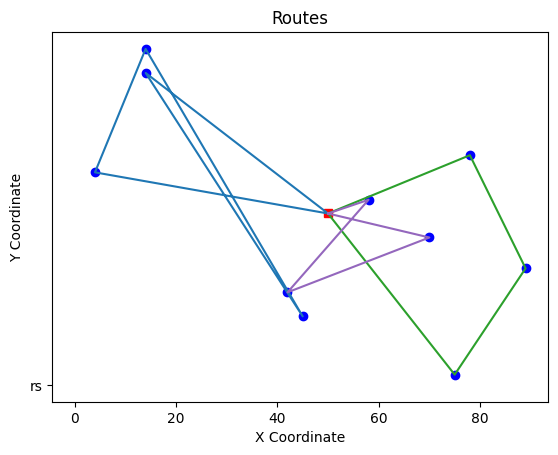

In [14]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles): # Iterate through each route in the individual
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()
individual=([0,1,3,7,9,4,6,2,5,8])
plot_routes(individual)



gen	nevals	avg    	min    
0  	300   	346.275	5.09699
1  	220   	314.232	1.84605
2  	240   	295.759	1.84605
3  	229   	275.074	6.44711
4  	228   	270.605	6.44711
5  	218   	256.905	6.44711
6  	220   	244.094	7.37088
7  	232   	239.532	7.37088
8  	223   	215.322	5.05655
9  	219   	196.369	7.37088
10 	251   	195.47 	7.37088
11 	221   	183.749	7.37088
12 	221   	168.863	7.37088
13 	212   	120.155	7.37088
14 	216   	86.3948	7.37088
15 	222   	74.618 	7.37088
16 	229   	68.3417	7.37088
17 	230   	71.5823	7.37088
18 	228   	71.6711	7.37088
19 	244   	64.9658	7.37088
20 	223   	64.4233	7.37088
21 	222   	70.9915	7.37088
22 	223   	62.073 	7.37088
23 	218   	66.835 	7.37088
24 	240   	65.5   	7.37088
25 	227   	64.65  	7.37088
26 	235   	65.2191	7.37088
27 	235   	65.2106	7.37088
28 	235   	67.988 	7.37088
29 	240   	67.0406	7.37088
30 	235   	66.4712	7.37088
31 	232   	62.5981	7.37088
32 	229   	66.1401	7.37088
33 	243   	65.0791	7.37088
34 	214   	68.2511	7.37088
35 	234   	71.159 	7.37088
3

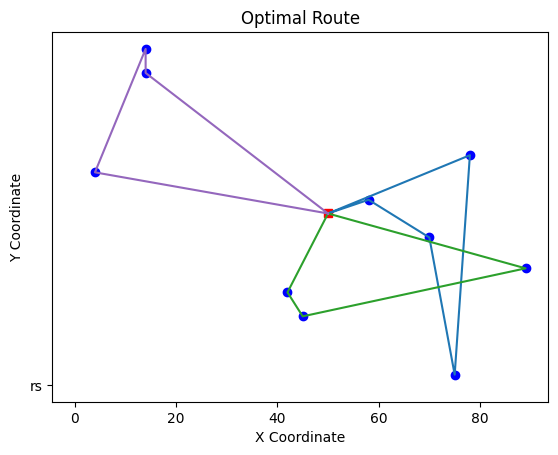

In [16]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    pop, stats, hof = main()